<a href="https://colab.research.google.com/github/RishithaSrija/Machine_Learning/blob/main/ML_Hyp_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import seaborn as sns
import pandas as pd

df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [102]:
df.shape

(6341, 14)

In [103]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6341,6341,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,2019-03-16 08:30:26.574830080,2019-03-16 08:44:47.525784832,1.544078,2.997707,12.887931,1.972703,0.314793,18.310263
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.000000,0.000000,1.300000
25%,2019-03-08 15:28:20,2019-03-08 15:54:00,1.000000,0.990000,6.500000,0.000000,0.000000,10.800000
50%,2019-03-15 21:57:47,2019-03-15 22:07:48,1.000000,1.650000,9.500000,1.750000,0.000000,14.160000
75%,2019-03-23 17:45:29,2019-03-23 17:57:56,2.000000,3.200000,15.000000,2.820000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,23.190000,24.020000,174.820000
std,NaN,NaN,1.207948,3.719775,10.722249,2.361897,1.369174,12.950365


In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6341 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(1), o

In [107]:
import matplotlib.pyplot as plt
df.isnull()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
((df.shape[0]-df.dropna().shape[0])/df.shape[0])*100  #92 records are being deleted

0.0

In [109]:
df=df.dropna()

In [110]:
df.reset_index(drop=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6337,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6338,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6339,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
#EDA

In [53]:
#tip is the Target column
#tip is numerical column
df.tip.value_counts()

,count
tip,
0.00,2244
1.00,312
2.00,211
2.16,89
1.86,79
...,...
11.00,1
10.30,1
8.89,1


In [ ]:
#tip is numerical feature,analyze with feature which categorical

In [52]:
df.color.value_counts()

,count
color,
yellow,5373
green,968


<Axes: xlabel='color', ylabel='tip'>

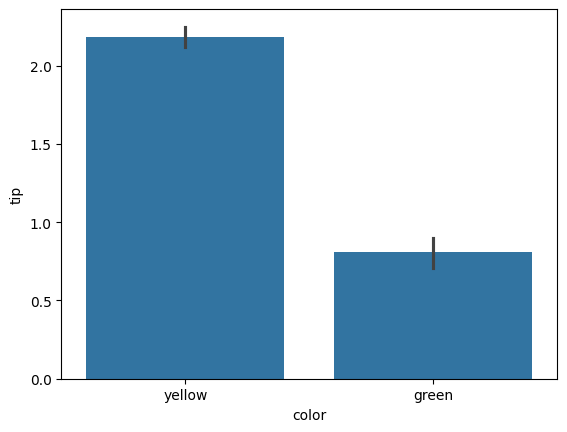

In [111]:
#Graphical analysis of categorical
sns.barplot(x='color',y='tip',data=df,estimator='mean')

<Axes: xlabel='color', ylabel='tip'>

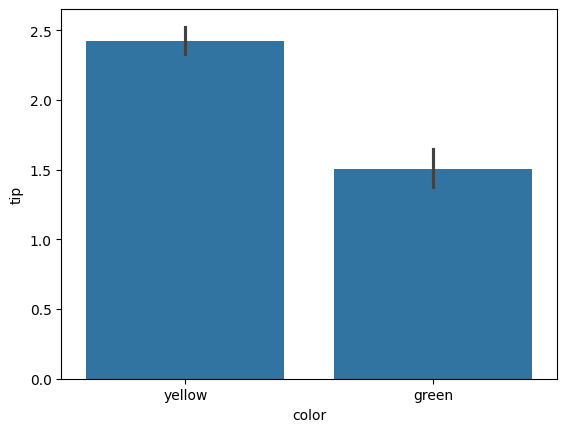

In [54]:
#Graphical analysis of categorical
sns.barplot(x='color',y='tip',data=df,estimator='std')

#Insight-barplot
Here x-label has colors and y-label has tip values,Here w.r.t standard deviation tip value for yellow color are more than green color.The passengers travelled in yellow taxis are more as they are in more availability so they had collected higher tips.

<Axes: xlabel='tip', ylabel='Count'>

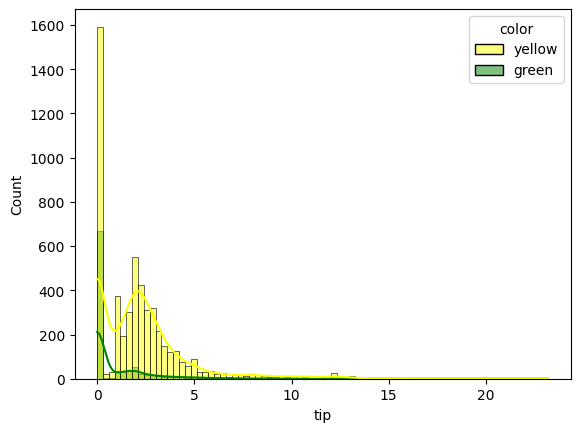

In [55]:

palette = {'yellow': 'yellow', 'green': 'green'}
sns.histplot(x=df['tip'], hue=df['color'], kde=True, palette=palette)


#Insight-histogram plot

Here x-label contains tip amount and y-label contains count.
For smaller ranges of tip values count is higher and above 5 tip value , the counts are really low that show many of the passengers had give tip below 5 and there are very less passengers who had given more tip.

#

In [56]:
# Independent T-Test
from scipy import stats
yellow_tip = df[df['color']=='green']['tip']
green_tip = df[df['color']=='yellow']['tip']

t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by color")
else:
    print("Fail to reject null hypothesis: No significant tip difference by color")


Independent T-Test statistic: -17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis: Tip differs by color


<Axes: xlabel='tip', ylabel='Count'>

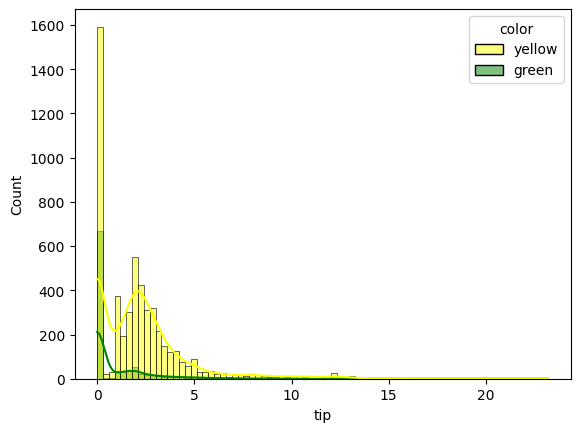

In [57]:
palette = {'yellow': 'yellow', 'green': 'green'}
sns.histplot(x=df['tip'], hue=df['color'], kde=True, palette=palette)

In [112]:
card=df['tip'].loc[df['color']=='yellow']
cash=df['tip'].loc[df['color']=='green']

In [113]:
# Independent T-Test:2 categories then we use

# H0:Distribution of tip no significance difference by green cab
# H1:Distribution of tip has significance difference by green cab

import numpy as np
credit_tip = df[df['color'] == 'yellow']['tip']
cash_tip = df[df['color'] == 'green']['tip']

t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by color")
else:
  print("Fail to reject null hypothesis: No significant tip difference by color")

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis: Tip differs by color


In [58]:
df.payment.value_counts()

,count
payment,
credit card,4546
cash,1795


In [59]:
card=df['tip'].loc[df['payment']=='credit card']
cash=df['tip'].loc[df['payment']=='cash']


In [ ]:
# Independent T-Test:2 categories then we use

# H0:Distribution of tip no significance difference by payment
# H1:Distribution of tip has significance difference by payment

import numpy as np
credit_tip = df[df['payment'] == 'credit card']['tip']
cash_tip = df[df['payment'] == 'cash']['tip']

t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by payment")
else:
    print("Fail to reject null hypothesis: No significant tip difference by payment")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: Tip differs by payment


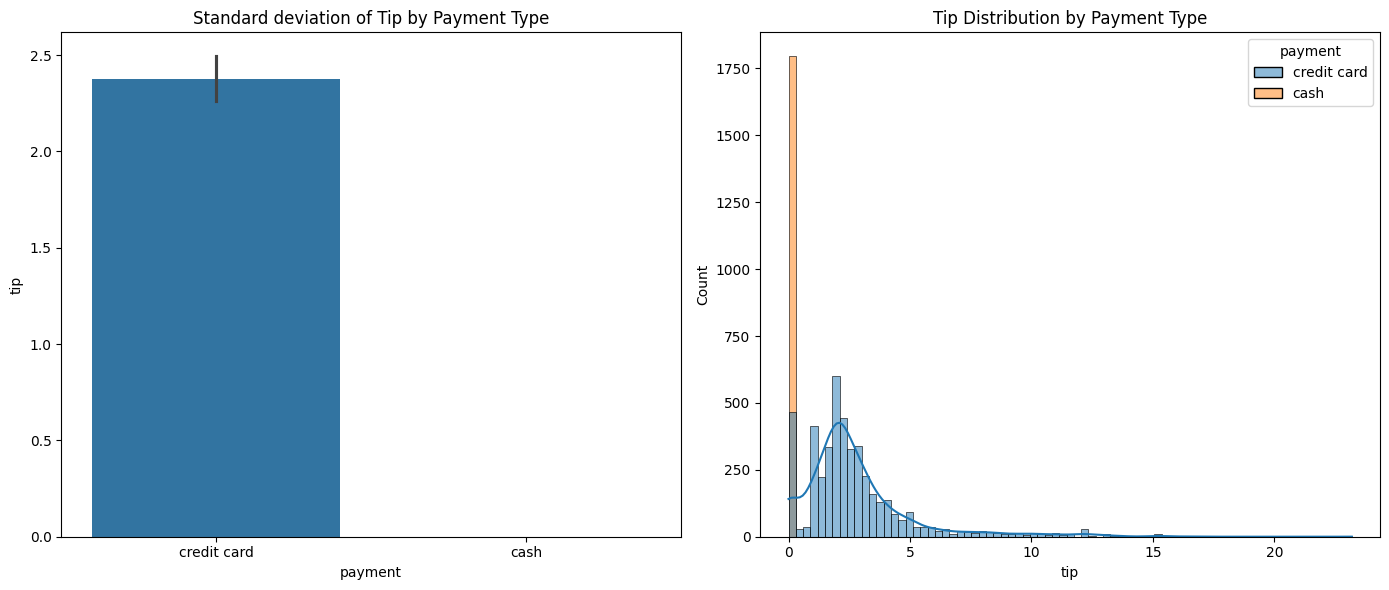

In [60]:
import numpy as np
credit_tip = df[df['payment'] == 'credit card']['tip']
cash_tip = df[df['payment'] == 'cash']['tip']

# Independent T-Test
t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by payment")
else:
    print("Fail to reject null hypothesis: No significant tip difference by payment")

# 1 row, 2 columns → two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.barplot(data=df, x="payment", y="tip", estimator=np.std, ax=axes[0])
axes[0].set_title("Standard deviation of Tip by Payment Type")

# Histplot with KDE
sns.histplot(data=df, x="tip", hue="payment", kde=True, ax=axes[1], alpha=0.5)
axes[1].set_title("Tip Distribution by Payment Type")

plt.tight_layout()
plt.show()

In [61]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-953540929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_borough'],palette='Set1')


<Axes: xlabel='pickup_borough', ylabel='count'>

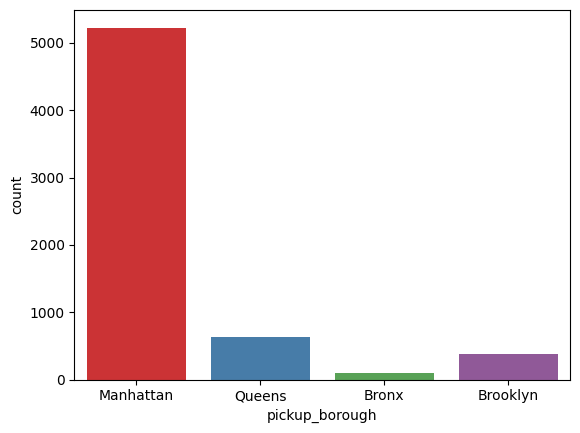

In [62]:
sns.countplot(x=df['pickup_borough'],palette='Set1')

/tmp/ipython-input-1864365659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,estimator=np.std,palette='rainbow')


<Axes: xlabel='pickup_borough', ylabel='tip'>

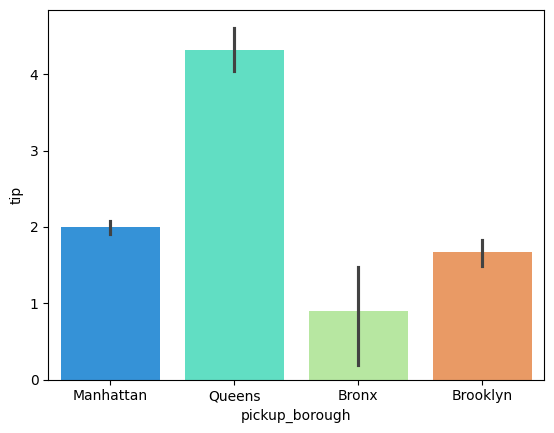

In [63]:

sns.barplot(x=df.pickup_borough,y=df.tip,estimator=np.std,palette='rainbow')

In [64]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


<Axes: xlabel='tip', ylabel='Count'>

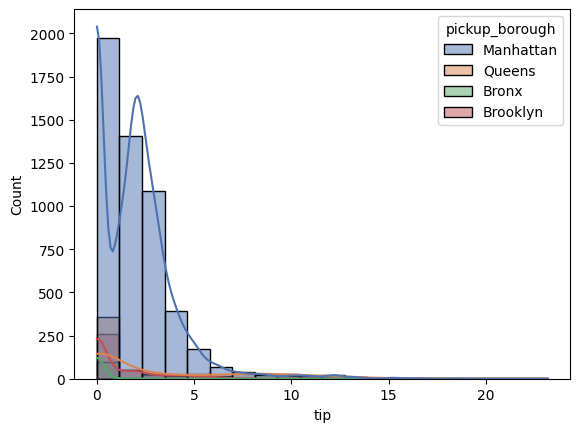

In [65]:
sns.histplot(x=df.tip,hue=df['pickup_borough'],bins=20,kde=True,palette='deep')

**Hypothesis**
- H0:Distribution of tip is same across all pickup_borough categories.
- H1:Atleast 1 category have different distribution of tip.

In [66]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
stat,p_value=stats.f_oneway(manhattan_tip,brooklyn_tip,queens_tip,bronx_tip)

In [67]:
#ANOVA test
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA test statistic:",f_stat)
print("P-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")


ANOVA test statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis


In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df['tip'],groups=df['pickup_borough'],alpha=0.5)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.4652 1.1958   True
    Bronx Manhattan    1.797   0.0 1.4688 2.1253   True
    Bronx    Queens   2.9179   0.0 2.5684 3.2674   True
 Brooklyn Manhattan   0.9665   0.0 0.7941 1.1388   True
 Brooklyn    Queens   2.0873   0.0 1.8773 2.2973   True
Manhattan    Queens   1.1209   0.0 0.9852 1.2566   True
-------------------------------------------------------


**Hypothesis**
- H0:Distribution of tip is same across all dropoff_borough categories.
- H1:Atleast 1 category have different distribution of tip.

In [69]:
manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
stat,p_value=stats.f_oneway(manhattan_tip,brooklyn_tip,queens_tip,bronx_tip)
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA test statistic:",f_stat)
print("P-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

ANOVA test statistic: 23.78981400797117
P-value: 2.6378206902104746e-15
Reject null hypothesis


In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.5)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.50      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  1.0256  1.7482   True
    Bronx     Manhattan   1.4296    0.0  1.1053   1.754   True
    Bronx        Queens   1.8873    0.0  1.5287  2.2459   True
    Bronx Staten Island  13.6303    0.0 10.9708 16.2898   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.1326  0.2181  False
 Brooklyn        Queens   0.5004 0.0055  0.2677  0.7332   True
 Brooklyn Staten Island  12.2434    0.0  9.5979 14.8889   True
Manhattan        Queens   0.4577 0.0002   0.288  0.6274   True
Manhattan Staten Island  12.2007    0.0    9.56 14.8414   True
   Queens Staten Island   11.743    0.0  9.0978 14.3881   True
--------------------------------------------------------------


In [126]:
df['pickup_zone'].value_counts()

,count
pickup_zone,
Midtown Center,227
Penn Station/Madison Sq West,209
Clinton East,208
Upper East Side South,208
Midtown East,196
...,...
Ozone Park,1
Glendale,1
Woodlawn/Wakefield,1


In [127]:
df['dropoff_zone'].value_counts()

,count
dropoff_zone,
Upper East Side North,244
Murray Hill,217
Midtown Center,215
Midtown East,175
Upper East Side South,173
...,...
Queensboro Hill,1
Homecrest,1
Madison,1


In [71]:
#Anova test
cate=[group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat,p_val=stats.f_oneway(*cate)
print("P-values",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

P-values 7.892434822136223e-169
Reject null hypothesis


In [72]:
#Anova test
categ=[group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat,p_val=stats.f_oneway(*categ)
print("P-values",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

P-values 1.3107168403745948e-120
Reject null hypothesis


<Axes: xlabel='tip', ylabel='Count'>

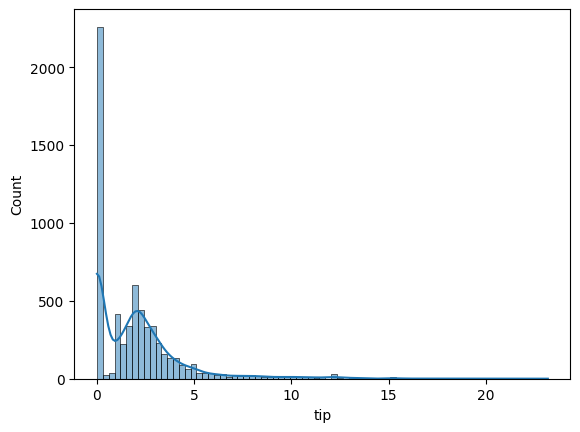

In [73]:
sns.histplot(df.tip,kde=True)

<Axes: xlabel='total', ylabel='Count'>

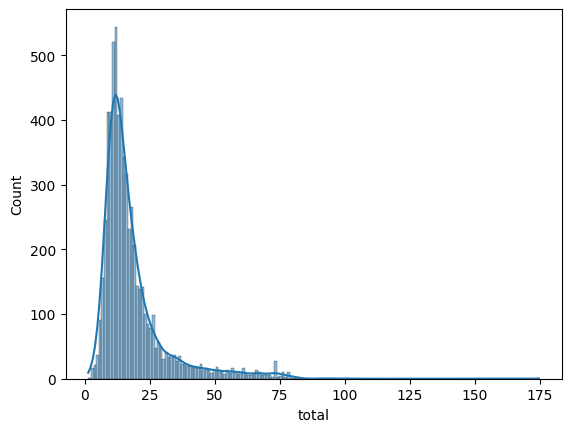

In [114]:
sns.histplot(df.total,kde=True)

<Axes: xlabel='distance', ylabel='Count'>

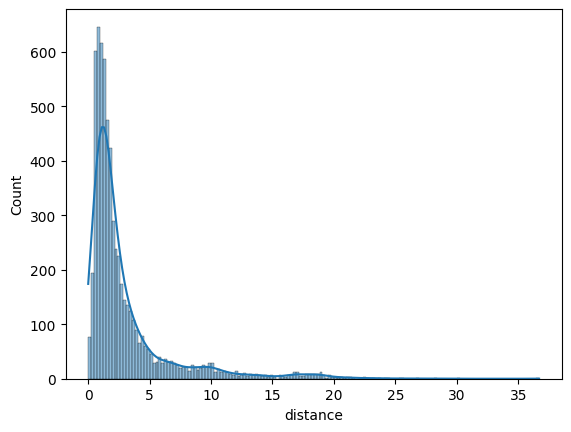

In [115]:
sns.histplot(df.distance,kde=True)

<Axes: xlabel='tip', ylabel='passengers'>

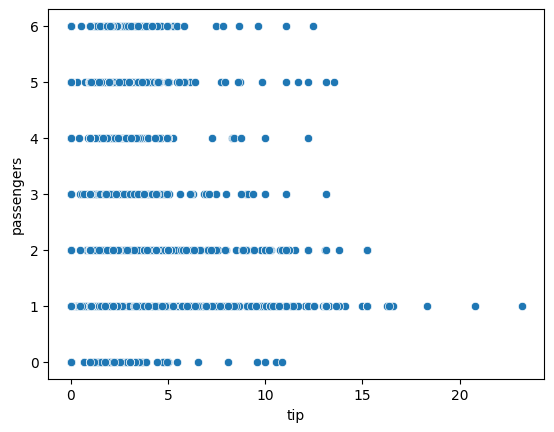

In [74]:
sns.scatterplot(x=df.tip,y=df.passengers)

<Axes: xlabel='tip', ylabel='fare'>

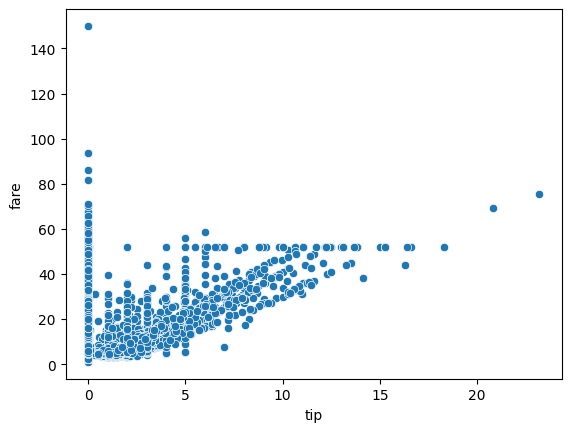

In [75]:
sns.scatterplot(x=df.tip,y=df.fare)

<Axes: xlabel='tip', ylabel='total'>

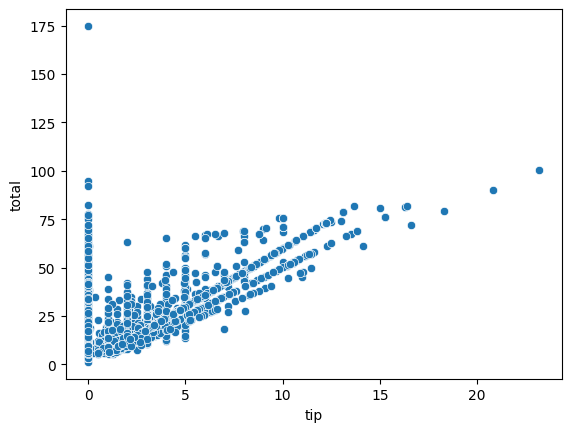

In [76]:
sns.scatterplot(x=df.tip,y=df.total)

<Axes: xlabel='tip', ylabel='tolls'>

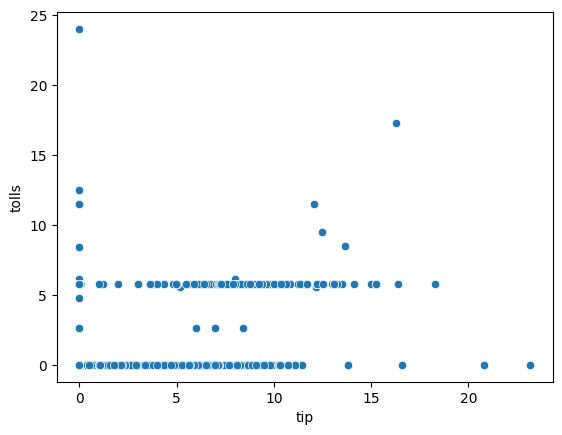

In [77]:
sns.scatterplot(x=df.tip,y=df.tolls)

<Axes: xlabel='tip', ylabel='distance'>

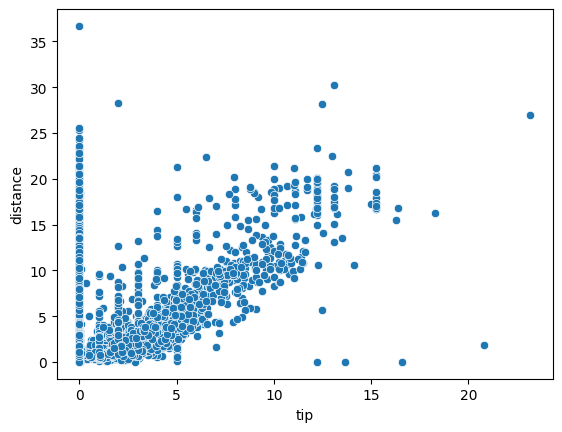

In [78]:
sns.scatterplot(x=df.tip,y=df.distance)

<Axes: xlabel='distance', ylabel='Count'>

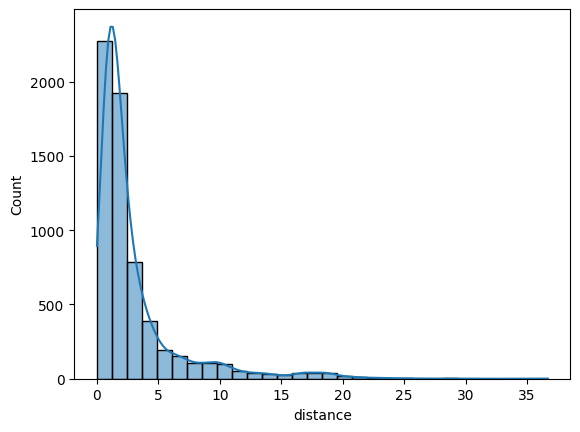

In [81]:
import seaborn as sns
sns.histplot(x=df.distance,bins=30,kde=True)

<Axes: xlabel='total', ylabel='Count'>

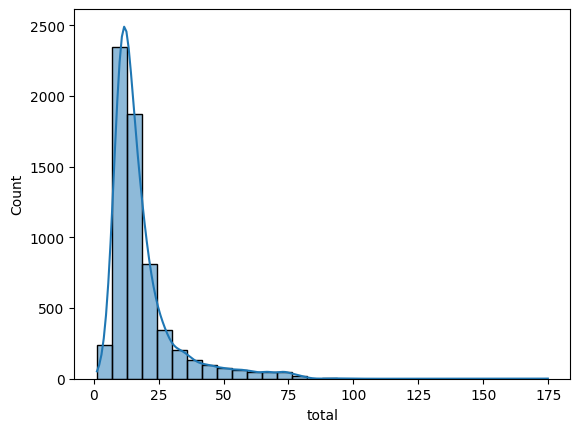

In [82]:
sns.histplot(x=df.total,bins=30,kde=True)

<Axes: xlabel='tip', ylabel='Count'>

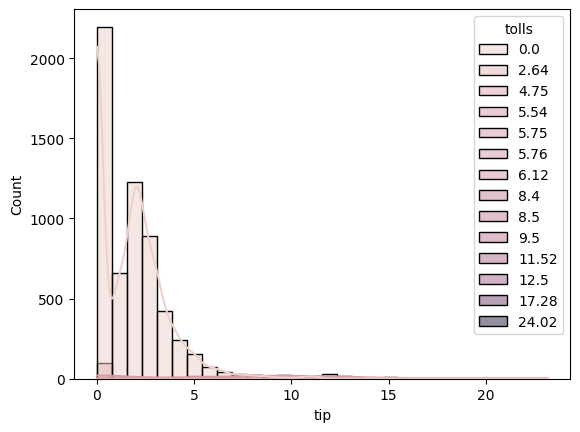

In [83]:
sns.histplot(x=df.tip,hue=df.tolls,bins=30,kde=True)

<Axes: xlabel='fare', ylabel='Count'>

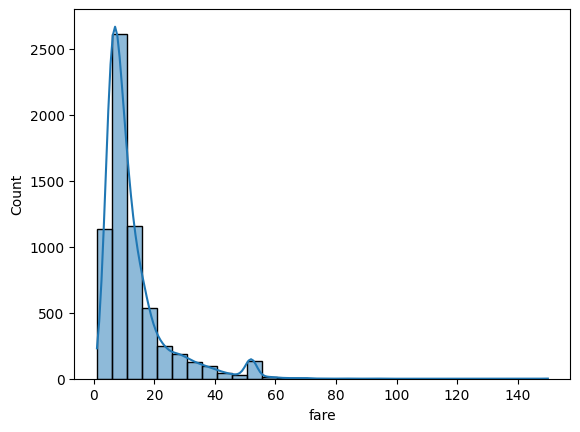

In [84]:
sns.histplot(x=df.fare,bins=30,kde=True)

<Axes: xlabel='passengers', ylabel='Count'>

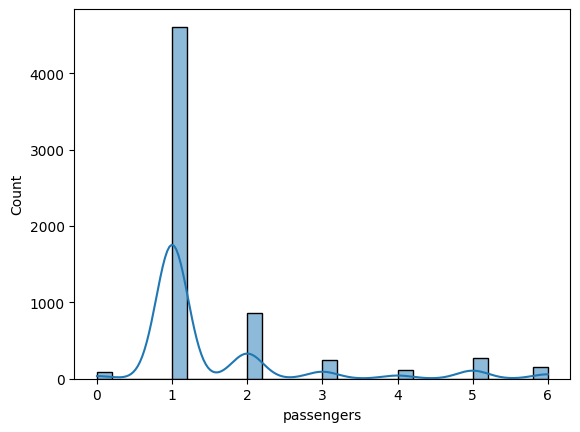

In [85]:
sns.histplot(x=df.passengers,bins=30,kde=True)

<Axes: >

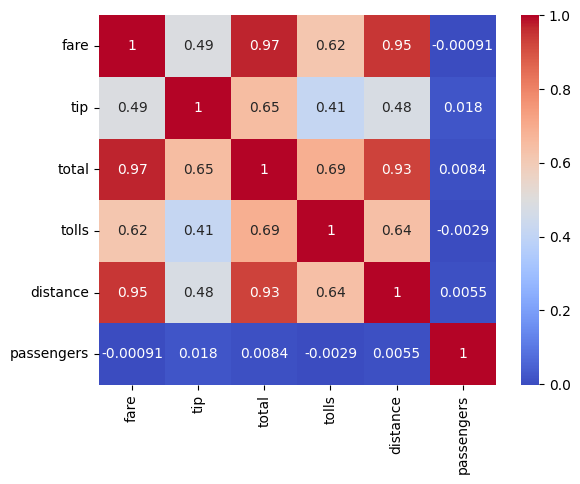

In [86]:
nm=df[['fare','tip','total','tolls','distance','passengers']]
sns.heatmap(nm.corr(),annot=True,cmap='coolwarm')

In [87]:
df['total'].value_counts()

,count
total,
9.30,145
11.30,128
10.30,120
9.80,119
11.80,118
...,...
55.80,1
27.55,1
34.28,1


In [88]:
df['tolls'].value_counts()

,count
tolls,
0.00,6003
5.76,316
2.64,6
11.52,4
5.54,2
6.12,2
17.28,1
8.40,1
9.50,1


In [89]:
df['fare'].value_counts()

,count
fare,
7.50,348
6.00,344
6.50,322
5.00,309
5.50,308
...,...
71.20,1
41.63,1
13.61,1


In [90]:
df['distance'].value_counts()

,count
distance,
0.80,130
1.00,117
0.90,113
0.70,106
1.10,106
...,...
6.33,1
8.20,1
10.27,1


In [91]:
df['passengers'].value_counts()

,count
passengers,
1,4608
2,865
5,277
3,240
6,152
4,109
0,90


In [92]:
df['tip'].value_counts()

,count
tip,
0.00,2244
1.00,312
2.00,211
2.16,89
1.86,79
...,...
11.00,1
10.30,1
8.89,1


**In Taxi dataset, “total” is taken as dependent variable.
We perform Multiple Linear Regression with fare, tip, tolls, distance, and passengers as predictors.
Model significance is tested using F-test,
and predictor significance is tested using t-tests.
Correlation matrix is used to understand variable relationships.**

In [93]:
import statsmodels.api as sm
nm=df[['fare','tip','total','tolls','distance','passengers']]
X = nm[['fare','tip','tolls','distance','passengers']]
y = nm['total']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.917e+05
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:17:30   Log-Likelihood:                -9302.9
No. Observations:                6341   AIC:                         1.862e+04
Df Residuals:                    6335   BIC:                         1.866e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0155      0.031     97.047      0.0

Correlation Test Decision Table
| Data Condition                       | Which Correlation Test? | Why                            |
| ------------------------------------ | ----------------------- | ------------------------------ |
| Data is **normal** + linear          | **Pearson**             | Measures linear relation       |
| Data is **skewed** or **non-linear** | **Spearman**            | Rank-based → resistant to skew |
| Severe **outliers** present          | **Spearman**            | Not affected by extremes       |
Decision Using Skewness & Kurtosis
| Condition                                       | Data Status      | Which correlation test |
| ----------------------------------------------- | ---------------- | ---------------------- |
| Skewness between -1 and +1 **and** Kurtosis ≈ 3 | Data ~ Normal    | Pearson                |
| Skewness outside -1 to +1 **or** Kurtosis > 3   | Skewed, Outliers | Spearman               |



In [ ]:
#normal data:pearson , spearman:outlier skew data

In [128]:
df['tolls'].skew() #-0.5 to 0.5


np.float64(32.159491595605495)

In [117]:
df['tolls'].kurtosis()#<3

np.float64(32.159491595605495)

In [121]:
from scipy import stats
import statsmodels.api as sm

cols = ['fare','tip','total','tolls','distance','passengers']

for col in cols:
    stat, p = stats.shapiro(nm[col])
    print(f"{col}: p-value = {p}")
    if p > 0.05:
        print(" → Normal (Use Pearson)")
    else:
        print(" → Not Normal / Skewed (Use Spearman)")


fare: p-value = 1.8632197730998014e-73
 → Not Normal / Skewed (Use Spearman)
tip: p-value = 1.2428644865538874e-69
 → Not Normal / Skewed (Use Spearman)
total: p-value = 2.922694133274835e-73
 → Not Normal / Skewed (Use Spearman)
tolls: p-value = 5.55246960533175e-96
 → Not Normal / Skewed (Use Spearman)
distance: p-value = 1.5528674121345811e-78
 → Not Normal / Skewed (Use Spearman)
passengers: p-value = 5.366169856786988e-83
 → Not Normal / Skewed (Use Spearman)


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6341.
  res = hypotest_fun_out(*samples, **kwds)


In [122]:
print(nm.corr(method='pearson'))


                fare       tip     total     tolls  distance  passengers
fare        1.000000  0.487101  0.972311  0.617182  0.947958   -0.000912
tip         0.487101  1.000000  0.650677  0.414670  0.476980    0.017838
total       0.972311  0.650677  1.000000  0.690879  0.929224    0.008380
tolls       0.617182  0.414670  0.690879  1.000000  0.642333   -0.002885
distance    0.947958  0.476980  0.929224  0.642333  1.000000    0.005481
passengers -0.000912  0.017838  0.008380 -0.002885  0.005481    1.000000


In [123]:
print(nm.corr(method='spearman'))


                fare       tip     total     tolls  distance  passengers
fare        1.000000  0.310254  0.946613  0.367724  0.937097   -0.000692
tip         0.310254  1.000000  0.502830  0.175380  0.292651    0.027510
total       0.946613  0.502830  1.000000  0.377317  0.883803    0.020121
tolls       0.367724  0.175380  0.377317  1.000000  0.363687   -0.005465
distance    0.937097  0.292651  0.883803  0.363687  1.000000    0.004688
passengers -0.000692  0.027510  0.020121 -0.005465  0.004688    1.000000


In [79]:
r,p_val=stats.pearsonr(df['tip'],df['fare'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.48710089077355956
P-value:  0.0
Reject null hypothesis


In [80]:
r,p_val=stats.spearmanr(df['tip'],df['distance'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.29265085410043695
P-value:  1.9411181331374707e-125
Reject null hypothesis


In [118]:
r,p_val=stats.spearmanr(df['tip'],df['total'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.5028299699182296
P-value:  0.0
Reject null hypothesis


In [119]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.175380002891528
P-value:  5.643276180955435e-45
Reject null hypothesis


In [120]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.027509812818779178
P-value:  0.028480753176042872
Reject null hypothesis
